In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import gzip, glob, os, csv
import seaborn as sns

In [3]:
RUN_NAMES = [
             'p40_high_density_strong_effects/', 
             'p40_high_density_weak_effects'
#              'p50_high_density_small_edges',
#              'p50_low_density_standard_edges',
#              'p50_low_density_small_edges'
            ]

all_runs = [(base_name,
             '/u/home/a/asxue/project-hjp/dotears/data/{}/benchmarks/'.format(base_name),
            ) for base_name in RUN_NAMES]

df = pd.DataFrame(columns=['s', 
                           'h:m:s', 
                           'max_rss', 
                           'max_vms', 
                           'max_uss', 
                           'max_pss', 
                           'io_in', 
                           'io_out', 
                           'mean_load', 
                           'cpu_time', 
                           'method'])

for base_name, benchmark_dir in all_runs:
    methods = [os.path.basename(x) for x in glob.glob(os.path.join(benchmark_dir, '*'))]
    
    for method in methods:
        method_dir = os.path.join(benchmark_dir, method)
        
        experiment_dirs = glob.glob(os.path.join(method_dir, '*'))
        
        for exp_dir in experiment_dirs:
            for dag_dir in glob.glob(os.path.join(exp_dir, '*')):
                for f in glob.glob(os.path.join(dag_dir, '*')):
     
                    f_df = pd.read_csv(f, delimiter='\t')

                    f_df['method'] = method
                    df.loc[len(df.index), :] = f_df.loc[0]

        

In [4]:
df

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,method
0,76.8973,0:01:16,137.36,473.04,138.71,138.79,169.71,0.0,23.55,18.3,direct-lingam
1,21.3997,0:00:21,136.78,439.0,135.34,135.45,166.7,0.0,42.38,9.07,direct-lingam
2,105.1698,0:01:45,134.77,438.95,133.33,133.57,166.71,0.0,30.0,31.56,direct-lingam
3,16.1089,0:00:16,138.99,474.55,136.29,136.49,169.71,0.0,74.74,12.1,direct-lingam
4,63.55,0:01:03,134.77,438.95,133.39,133.68,166.77,0.0,62.17,39.52,direct-lingam
...,...,...,...,...,...,...,...,...,...,...,...
3979,4774.1273,1:19:34,21124.36,27035.57,21117.13,21119.78,1.04,878.23,84.56,4037.22,dcdi-g
3980,4697.4483,1:18:17,42759.01,48186.85,42751.7,42754.39,1.04,1366.91,99.35,4666.69,dcdi-g
3981,6255.2872,1:44:15,41012.45,46325.45,40936.25,40974.86,0.0,1587.95,99.18,6203.81,dcdi-g
3982,5734.2916,1:35:34,37312.66,42622.29,37305.34,37308.04,1.04,1483.36,99.4,5699.46,dcdi-g


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'direct-lingam'),
  Text(1, 0, 'sortnregress'),
  Text(2, 0, 'igsp'),
  Text(3, 0, 'ut-igsp'),
  Text(4, 0, 'gies'),
  Text(5, 0, 'notears'),
  Text(6, 0, 'golem-nv'),
  Text(7, 0, 'dotears'),
  Text(8, 0, 'golem-ev'),
  Text(9, 0, 'dcdi-g')])

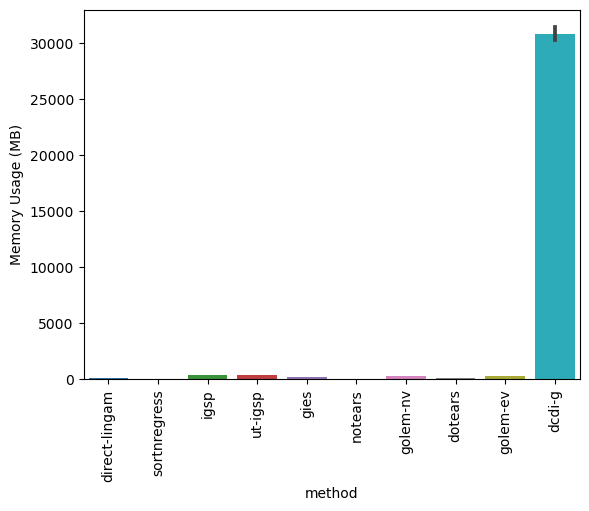

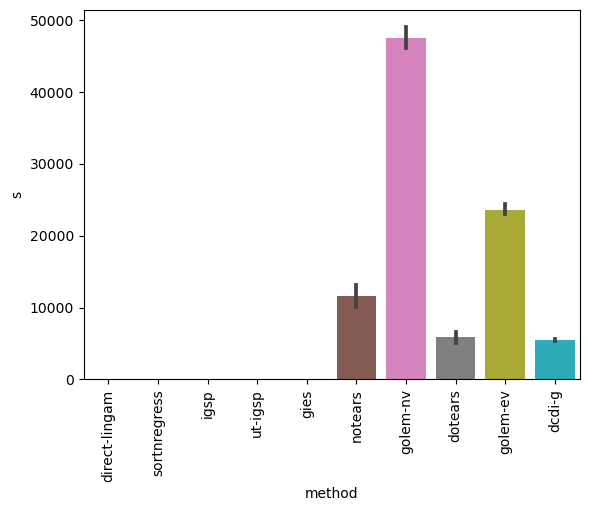

In [5]:
plt.figure()
sns.barplot(data=df, x='method', y='max_uss')
plt.xticks(rotation=90)
# plt.yscale('log')
plt.ylabel('Memory Usage (MB)')

plt.figure()
sns.barplot(data=df, x='method', y='s')
plt.xticks(rotation=90)
# plt.yscale('log')

In [6]:
df.loc[df['method'] == 'dcdi-g', 'max_uss'].max()

73101.78

In [11]:
df.loc[df['method'] == 'dcdi-g', 's'].mean() / 3600

1.5284994323119296

In [8]:
df.columns

Index(['s', 'h:m:s', 'max_rss', 'max_vms', 'max_uss', 'max_pss', 'io_in',
       'io_out', 'mean_load', 'cpu_time', 'method'],
      dtype='object')